# Imports

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Serie 10
## 1. a)

In [8]:
# 1)
grain_sizes = [245, 233, 249, 255, 238, 251, 245, 250, 236, 238]
gs_mean = np.mean(grain_sizes)
print('Schätzer Erwartungswert Grundgesamtheit:', gs_mean)

Schätzer Erwartungswert Grundgesamtheit: 244.0


$${\hat{\sigma}}^2 = s^2 * {\dfrac{n}{n-1}}$$

In [4]:
# variance
# divides by n - ddof
# to account for the variance of the hypothetically whole population, set ddof to 1
gs_var = np.var(grain_sizes, ddof=1)
gs_var

54.44444444444444

In [7]:
# std. dev.
gs_sd = np.std(grain_sizes, ddof=1)
print('Schätzer Standardabweichung Grundgesamtheit:', gs_sd)

Schätzer Standardabweichung Grundgesamtheit: 7.378647873726218


In [6]:
# Standardfehler des Schätzers des Mittelwerts
gs_sf = np.std(grain_sizes, ddof=1) / np.sqrt(len(grain_sizes))
print('Standardfehler:', gs_sf)

Standardfehler: 2.333333333333333


## 1. b)

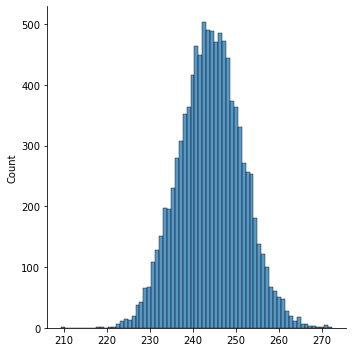

In [26]:
# generate a bigger sample of size 10'000 by mean and standard deviation
sample = stats.norm.rvs(loc=gs_mean, scale=gs_sd, size=10000, random_state=13)
sns.displot(sample)

In [27]:
# probability of grain size being higher than 250mg
# using survival function (portion of distribution higher than 250 -> the right tail)
gs_prob_higher_250 = stats.norm.sf(250, loc=gs_mean, scale=gs_sd)

print(np.round(gs_prob_higher_250 * 100, 2), '%')

20.81 %


## 2. a)

### Group 25

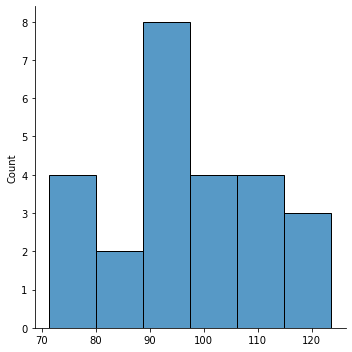

In [28]:
iq_sample_25 = stats.norm.rvs(loc=100, scale=15, size=25, random_state=42)
sns.displot(iq_sample_25)

In [29]:
# Average IQ
np.mean(iq_sample_25)

97.54737912012862

In [30]:
# Standard Deviation
np.std(iq_sample_25, ddof=1)

14.348295814423565

In [31]:
# Standard Error
np.std(iq_sample_25, ddof=1) / np.sqrt(len(iq_sample_25))

2.8696591628847132

### Group 400

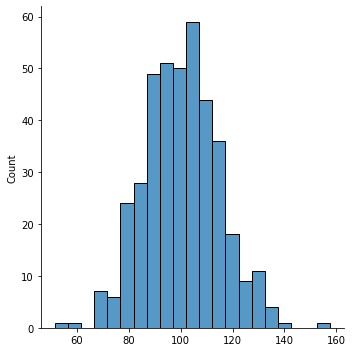

In [32]:
iq_sample_400 = stats.norm.rvs(loc=100, scale=15, size=400, random_state=42)
sns.displot(iq_sample_400)

In [33]:
# Average IQ
np.mean(iq_sample_400)

100.33822916295094

In [34]:
# Standard Deviation (Population)
np.std(iq_sample_400, ddof=1)

14.404568614460901

In [35]:
# Standard Error
np.std(iq_sample_400, ddof=1) / np.sqrt(np.size(iq_sample_400))

0.7202284307230451

## 2. b)

### Gruppe mit 25

#### Mit welcher Wahrscheinlichkeit liegt der IQ einer einzelnen Person zwischen 97 und 103?

In [36]:
# Mit welcher Wahrscheinlichkeit liegt der IQ einer einzelnen Person zwischen 97 und 103?
P_lower_97 = stats.norm.cdf(97, loc=100, scale=15)
P_higher_103 = stats.norm.sf(103, loc=100, scale=15)
P_lower_97_or_higher_103 = P_lower_97 + P_higher_103
P_between_97_and_103 = 1 - P_lower_97_or_higher_103
print('based on norm.cdf:', np.round(P_between_97_and_103 * 100, 2), '%')

based on norm.cdf: 15.85 %


#### Mit welcher Wahrscheinlichkeit liegt der durchschnittliche IQ einer Gruppe von 25 Personen zwischen 97 und 103?

ich nehme an Variante 1 ist falsch und Variante 2 korrekt?

In [37]:
# Mit welcher Wahrscheinlichkeit liegt der durchschnittliche IQ einer Gruppe von 25 Personen zwischen 97 und 103?
lower_97 = (iq_sample_25 < 97).sum()
higher_103 = (iq_sample_25 > 103).sum()
P_group_25_between_97_and_103 = (1 / len(iq_sample_25)) * (len(iq_sample_25) - lower_97 - higher_103)
P_group_25_between_97_and_103

0.08

In [38]:
P_lower_97 = stats.norm.cdf(97, loc=100, scale=15 / np.sqrt(25))
P_higher_103 = stats.norm.sf(103, loc=100, scale=15 / np.sqrt(25))
P_lower_97_or_higher_103 = P_lower_97 + P_higher_103
P_between_97_and_103 = 1 - P_lower_97_or_higher_103
print('based on standard error cosidering sample size:', np.round(P_between_97_and_103 * 100, 2), '%')

based on standard error cosidering sample size: 68.27 %


#### Mit welcher Wahrscheinlichkeit liegt der durchschnittliche IQ einer Gruppe von 400 Personen zwischen 97 und 103?

ich nehme an Variante 1 ist falsch und Variante 2 korrekt?

In [132]:
# Mit welcher Wahrscheinlichkeit liegt der durchschnittliche IQ einer Gruppe von 400 Personen zwischen 97 und 103?
lower_97 = (iq_sample_400 < 97).sum()
higher_103 = (iq_sample_400 > 103).sum()
P_group_400_between_97_and_103 = (1 / len(iq_sample_400)) * (len(iq_sample_400) - lower_97 - higher_103)
P_group_400_between_97_and_103

0.15

In [39]:
P_lower_97 = stats.norm.cdf(97, loc=100, scale=15 / np.sqrt(400))
P_higher_103 = stats.norm.sf(103, loc=100, scale=15 / np.sqrt(400))
P_lower_97_or_higher_103 = P_lower_97 + P_higher_103
P_between_97_and_103 = 1 - P_lower_97_or_higher_103
print('based on standard error cosidering sample size:', np.round(P_between_97_and_103 * 100, 2), '%')

based on standard error cosidering sample size: 99.99 %


## 3. a)

In [41]:
sample_3 = [24, 34, 32, 36, 38, 32, 28]

In [44]:
# Erwartungswert der Grundgesamtheit - by definition is mean of the sample
np.mean(sample_3)

32.0

In [45]:
# Standardabweichung der Grundgesamtheit - ddof of 1 against bias
np.std(sample_3, ddof=1)

4.760952285695233

## 3. b)

In [136]:
# Bestimmen Sie das 95%-Konfidenzintervall für μ.
stats.norm.interval(0.95, loc=np.mean(sample_3), scale=np.std(sample_3, ddof=1))

(22.668704987923693, 41.33129501207631)

In [137]:
# Bestimmen Sie das 90%-Konfidenzintervall für μ.
stats.norm.interval(0.90, loc=np.mean(sample_3), scale=np.std(sample_3, ddof=1))

(24.168930365131292, 39.831069634868705)

## 4. a) & b)

In [138]:
# Assuming the nail lengths are normally distributed
nail_sample = [50.12, 49.96, 50.35, 50.02, 49.80, 51.00, 50.12, 49.75]

In [139]:
# Geben Sie das Konfidenzintervall für die mittlere Länge der gesamten Produktion an
nail_sample_mean = np.mean(nail_sample)
nail_expected_population_std = np.std(nail_sample, ddof=1)

In [140]:
# a) mit einem 90%-Konfidenzintervall
stats.norm.interval(0.90, loc=nail_sample_mean, scale=nail_expected_population_std)

(49.48825593804548, 50.791744061954525)

In [141]:
# b) mit einem 99.9%-Konfidenzintervall
stats.norm.interval(0.999, loc=nail_sample_mean, scale=nail_expected_population_std)

(48.836187172637864, 51.44381282736215)

## 5.
Ein Verband bestehe aus 12100 Einzelfirmen. Von 225 zufällig ausgewählten Einzelfirmen wurde deren Jahresgewinn erhoben. Der Mittelwert betrug 600’000 sfr, die entsprechende Standardabweichung war 90’000sfr. Geben sie eine Intervallschätzung für diesen Mittelwert an (Irrtumswahrscheinlichkeit 4.55%).

In [47]:
profit_mean = 600000
sd = 90000
a = 0.0455
q = 1 - a
q

0.9545

In [48]:
# Confidence Interval for profit mean
stats.norm.interval(0.9545, loc=profit_mean, scale=sd)

(419999.7800490357, 780000.2199509642)

# Serie X
Aufgaben zu Konfidenzintervallen aus: J. Devore & N. Farnum, “Applied Statistics for Engineers and Scheintists”, Second Edition, 2005, Thomson Brooks/Cole, Belmont, USA

## Aufgabe 1

Yes, of a sample of n = 1

## Aufgabe 2

In [1]:
measurements = [103, 156, 118, 89, 125, 147, 122, 109, 138, 99]

In [4]:
# mean aus samples ist erwartungstreu
np.mean(measurements)

120.6

## Aufgabe 3

### a)

In [23]:
# sigma = 5
# 100000 samples of size n = 10
samples_n_10 = [stats.norm.rvs(scale=5, size=10) for x in range(100000)]
means_n_10 = [np.mean(sample) for sample in samples_n_10]

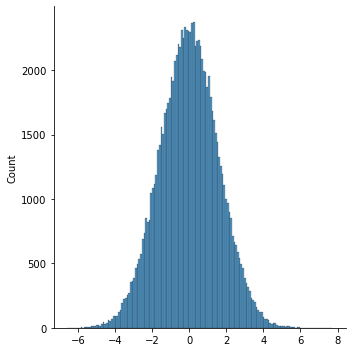

In [24]:
sns.displot(means_n_10)

In [35]:
# count proportion of sample mean values between -1 and 1
count = sum(-1 <= mean <= 1 > 0 for mean in means_n_10)
proportion_n10 = count / len(means_n_10)

print('probability that sample mean within +-1 from population mean:', proportion_n10)

probability that sample mean within +-1 from population mean: 0.47392


### b)

Same for n = 50, 100 and 1000

In [28]:
def helper_function(n, n_samples):
    samples = [stats.norm.rvs(scale=5, size=n) for x in range(n_samples)]
    means = [np.mean(sample) for sample in samples]
    count = sum(-1 <= mean <= 1 > 0 for mean in means)
    proportion = count / len(means_n_10)
    return proportion

In [29]:
proportion_n50 = helper_function(50, 100000)
proportion_n50

0.84209

In [30]:
proportion_n100 = helper_function(100, 100000)
proportion_n100

0.95385

In [37]:
proportion_n500 = helper_function(500, 100000)
proportion_n500

0.99999

In [31]:
proportion_n1000 = helper_function(1000, 100000)
proportion_n1000

1.0

### c)

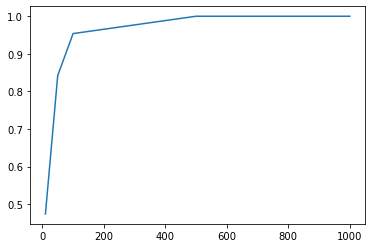

In [38]:
plt.plot([10, 50, 100, 500, 1000], [proportion_n10, proportion_n50, proportion_n100, proportion_n500, proportion_n1000])

We can clearly see: **The bigger the sample size, the better we can estimate the population mean!**

## Aufgabe 7

### a)

Find a confidence level for a data set by taking half of the size of the confidence interval, multiplying it by the square root of the sample size and then dividing by the sample standard deviation. Look up the resulting Z or t score in a table to find the level.

In [40]:
# how to calculate confidence level from confidence interval???
((3.09 / 2) * np.sqrt(100000))

488.5718984960146

# random stuff

In [7]:
stats.norm.cdf(-1, scale=5) # left tail bigger than 1

0.42074029056089696

In [8]:
stats.norm.sf(1, scale=5) # right tail bigger than 1

0.42074029056089696

In [39]:
np.sqrt(11)

3.3166247903554

# QQ-Plots

In [38]:
import statsmodels.api as sm

In [43]:
# generate some data to test QQ plot
expon_dist_data = stats.expon.rvs(size = 50)

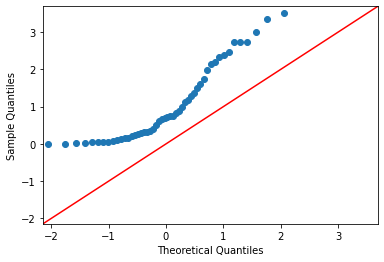

In [40]:
# is it a normal distribution?
fig = sm.qqplot(expon_dist_data, stats.norm, line='45')
plt.show()

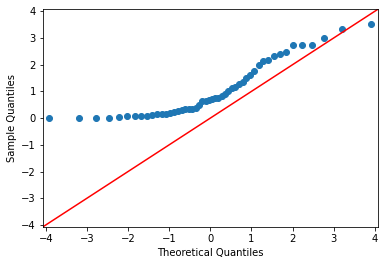

In [41]:
# is it a logistic distribution?
fig = sm.qqplot(expon_dist_data, stats.logistic, line='45')
plt.show()

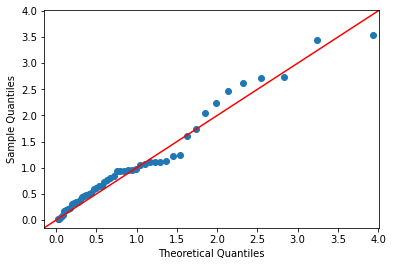

In [44]:
# it looks exponential!
fig = sm.qqplot(expon_dist_data, stats.expon, line='45')
plt.show()